### CS4423 - Networks
__Written by:__ Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

__Amended by:__ Priyansh Srivastava

#### 1. Graphs and Graph Theory

# Lecture 2: Graphs and `networkx`

<div class="alert alert-success">
    A <b>graph</b> can serve as a mathematical model of a network.
</div>

* We will use the `networkx` package to work with examples of graphs and networks.

* This notebook gives and introduction into graph theory, along with some basic, useful
  `networkx` commands.

* From now on, we load some `python` packages at the start of each
  notebook, so we have them available later on.

In [27]:
# Loading the networkx as nx
import networkx as nx

# For printing evereything
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##  The Internet, for Example

**Example.**  The internet in December 1970.  Nodes are computers,
connected by a link if they can directly communicate with each other.
At the time, only 13 computers participated in that network.

![the internet in december 1970](https://d1vq4hxutb7n2b.cloudfront.net/system/files/53b5c1/66342b8248f70002ea/h_1536/f7dec1970.jpg)


As far as the network structure is concerned, the following list of **adjacencies** contains all the information.

In [3]:
# Printing the list of adjacencies from a file
!cat data/arpa.adj

UCSB SRI UCLA
SRI UCLA STAN UTAH
UCLA STAN RAND
UTAH SDC MIT
RAND SDC BBN
MIT BBN LINC
BBN HARV
LINC CASE
HARV CARN
CASE CARN


The following **diagram**, built from the adjacenies in the list,
contains the same information, without the distracting details of the
US geography.

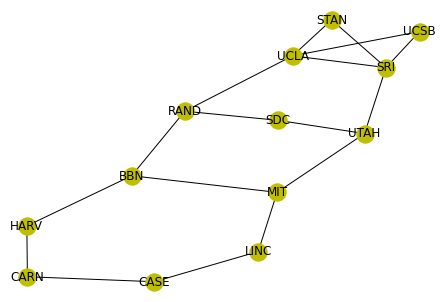

In [8]:
# Reading the graphs structure from the file
H = nx.read_adjlist("data/arpa.adj") # file should have .adj extension

# Making dictionary of options/parameters
opts = { "with_labels": True, # fow showing labels
        "node_color": 'y' } # for colours

# Drawing the graph
nx.draw(H,
        **opts) # attaching dictionary

## Simple Graphs

<div class="alert alert-danger">
    <b>Definition.</b> A (simple) <b>graph</b>
is a pair $G = (X, E)$, consisting of a (finite) set $X$ of
    objects, called <b>nodes</b> or <b>vertices</b> or <b>points</b>,
and a subset $E \subseteq \binom{X}{2}$
    of <b>links</b> or <b>edges</b>.
</div>

Usually, $n$ is used to denote the number of vertices of a graph,
$n = |X|$,
and $m$ for the number of edges, $m = |E|$.

$n = |X|$ is called the **order** of the graph $G$, and $m = |E|$ is called the  **size** of $G$.

Here, $\binom{X}{2}$, pronounced as "$X$ choose 2",
is the set of all $2$-element subsets of $X$.
(The notation is motivated by the fact that if $X$ has $n$ elements then
$\binom{X}{2}$ has $\binom{n}{2} = \frac12 n(n-1)$ elements:
$$\left|\binom{X}{2}\right| = \binom{|X|}{2}.$$
Obviously, $m \leq \binom{n}{2}$.

**Example.**
$X = \{ A, B, C, D \}$ and $E = \{ AB, BC, BD, CD \}$
(where $AB$ is short for $\{ A, B \}$).

##  Simple Graphs in `networkx`

* In `networkx`, we can construct this graph with the `Graph`
constructor function, which takes the node and edge sets $X$ and $E$ in a variety of formats.  
* Here, we use $2$-letter strings for 
the edges (which implicitly gives the nodes too): 

In [71]:
# Defining a graph object G
G = nx.Graph(["AB", "BC", "BD", "CD"])

* The `python` object `G` representing the graph $G$ has lots of useful attributes.  Firstly, it has `nodes` and `edges`.

In [30]:
# Printing the nodes
G.nodes # Node view
list(G.nodes) # List view

NodeView(('A', 'B', 'C', 'D'))

['A', 'B', 'C', 'D']

In [32]:
# Printing the edges
G.edges # Edge view
list(G.edges) # List view

EdgeView([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D')])

[('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

* A **loop** over a graph `G` will effectively loop over `G`'s nodes.

In [34]:
# Travesrsing each node using for-loop
for node in G: # G is the graph
    
    # printing the node
    print(node)

A
B
C
D


* We can count the nodes, and the edges.

In [47]:
# Counting the number of nodes
G.number_of_nodes()

# Printing the order
G.order()

print("The number of nodes should be equal to the order always!")

8

8

The number of nodes should be equal to the order always!


In [46]:
# Counting the number of edges
G.number_of_edges()

# Printing the size
G.size()

print("The number of edges should be equal to the size always!")

4

4

The number of edges should be equal to the size always!


* And a drawing of the graph can be produced.

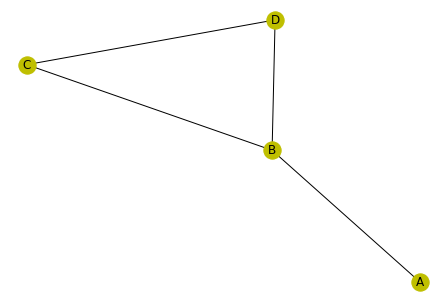

In [41]:
# Drawing the graph
nx.draw(G, **opts)

* The example also illustrates a typical way how diagrams of graphs are drawn:
nodes are represented by small circles, and edges by lines connecting the nodes.

* A graph `G` can be modified, by adding nodes one at a time ...

__Graph modifications__

In [72]:
# Adding a single node
G.add_node(1)

# Checking if added
list(G.nodes)

['A', 'B', 'C', 'D', 1]

* ... or many nodes at once ...

In [73]:
# Defining a list of nodes
myList = [2, 3, 5]

# Adding multiple nodes from list
G.add_nodes_from(myList)

# Printing the added nodes
list(G.nodes)

['A', 'B', 'C', 'D', 1, 2, 3, 5]

* ... or even as nodes of another graph `H`

In [74]:
# Prinitng the size and order
G.order(), G.size()

(8, 4)

* Adding edges works in a similar fashion

In [75]:
# Adding single edge
G.add_edge(1,2)

# Checking
list(G.edges)

[('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), (1, 2)]

In [76]:
# defining edge tuple
edge = (2,3)

# Attaching the edge
G.add_edge(*edge)

# Checking
list(G.edges)

[('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), (1, 2), (2, 3)]

In [77]:
# Defining the list of edge tuples
myEdges = [(1,5), (2,5), (3,5)]

# Adding multiple edges
G.add_edges_from(myEdges)

# Checking
list(G.edges)

[('A', 'B'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'D'),
 (1, 2),
 (1, 5),
 (2, 3),
 (2, 5),
 (3, 5)]

In [78]:
# Checking the order and size
G.order(), G.size()

(8, 9)

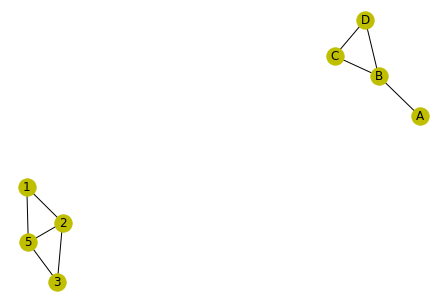

In [79]:
# Let's see how it looks now
nx.draw(G, **opts)

* There are corresponding commands for removing nodes or edges from a graph `G`

In [80]:
# Removing single edge
G.remove_edge(3,5)

# Checcking the order and size
G.order(), G.size()

(8, 8)

In [82]:
# Removing multiple edges
G.remove_edges_from([(2,5),(1,5)])

# Checking the order and size
G.order(), G.size()

(8, 6)

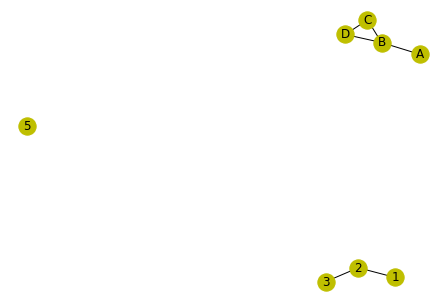

In [83]:
# Let's see now
nx.draw(G, **opts)

In [84]:
# Removing single node
G.remove_node(5)

#Checking
G.order(), G.size()

(7, 6)

* Removing a node will silently delete all edges it forms part of

In [85]:
# Removing multiple nodes
G.remove_nodes_from([1, 2, 3])

# Checking
G.order(), G.size()

(4, 4)

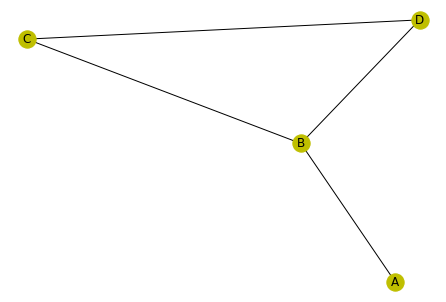

In [87]:
# Let's see
nx.draw(G, **opts)

* Each node has a list of **neighbors**, the nodes it is
  directly connected to by an edge of the graph.

In [92]:
# List the number of neighbours of B
list(G.neighbors('B')) # List view
G['B'] # Atlas view

['A', 'C', 'D']

AtlasView({'A': {}, 'C': {}, 'D': {}})

* The number of neighbors of node $x$ is its **degree**

In [99]:
# Printing the degree of individual node
G.degree('B')

# Printing the degree of individual nodes
G.degree # Degree view
list(G.degree) # List view

3

DegreeView({'A': 1, 'B': 3, 'C': 2, 'D': 2})

[('A', 1), ('B', 3), ('C', 2), ('D', 2)]

## Examples

### Complete Graphs

The [**complete graph**](https://en.wikipedia.org/wiki/Complete_graph)
on a vertex set $X$ is the graph with edge set all of $\binom{X}{2}$.

While it is somewhat straight-forward to find all $2$-element
subsets of a given set $X$ with a short `python` program,
it is probably more convenient (and possibly efficient) to use a function from the
`itertools` package for this purpose.

In [ ]:
nodes = range(5)
print(nodes)
print(list(nodes))

In [ ]:
from itertools import combinations
print(combinations(nodes, 2))
print(list(combinations(nodes, 2)))

In [ ]:
K5 = nx.Graph(combinations(nodes, 2))

In [ ]:
nx.draw(K5, **opts)

We can turn this procedure into a `python` function that
constructs the complete graph for an arbitrary vertex set $X$.

In [ ]:
def complete_graph(nodes):
    return nx.Graph(combinations(nodes, 2))

In [ ]:
nx.draw(complete_graph(range(3)), **opts)

In [ ]:
nx.draw(complete_graph(range(4)), **opts)

In [ ]:
nx.draw(complete_graph(range(5)), **opts)

In [ ]:
nx.draw(complete_graph(range(6)), **opts)

### Petersen Graph

The [Petersen Graph](https://en.wikipedia.org/wiki/Petersen_graph)
is a graph on $10$ vertices with $15$ edges.
It can be constructed 
as the complement of the line graph of the complete graph $K_5$,
i.e.,
as the graph with vertex set
$X = \binom{\{0,1,2,3,4\}}{2}$ (the edge set of $K_5$)
with an edge between $x, y \in X$ whenever $x \cap y = \emptyset$.

In [ ]:
nodes = K5.edges
print(list(combinations(nodes, 2)))

In [ ]:
edges = [e for e in combinations(nodes, 2) 
           if not set(e[0]) & set(e[1])]
len(edges)

In [ ]:
P = nx.Graph(edges)

In [ ]:
nx.draw(P, **opts)

Even though there is no parameter involved in this example,
it might be worth wrapping the construction up into a `python`
function.

In [ ]:
def petersen_graph():
    nodes = combinations(range(5), 2)
    G = nx.Graph()
    for e in combinations(nodes, 2):
        if not set(e[0]) & set(e[1]):
            G.add_edge(*e)
    return G

In [ ]:
nx.draw(petersen_graph(), **opts)

##  Code Corner

### `python`

* **dictionary unpacking** operator `**opts`: `python` function calls take **positional** arguments and **keyword** arguments.  
  The keyword arguments can be collected in a dictionary `opts` (with the keywords as keys).  
  This dictionary can then be passed into the function call in its "unwrapped" form `**opts`.

* `list` [[doc]](https://docs.python.org/3/library/stdtypes.html#list) turns its argument into a `python` list (if possible).

In [ ]:
list("networks")

* **list comprehension** [[doc]](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) allows the construction of new list from old ones
without explicit `for` loops (or `if` statements).

In [ ]:
[(x, y) for x in range(4) for y in range(4) if x < y]

### `networkx`

* the `read_adjlist` command [doc] constructs a graph from a text file in `adj` format.

* `G.nodes` [doc] returns the nodes of a graph `G` (as an iterator).

* `G.edges` [doc] returns the edges of a graph `G` (as an iterator).

### `itertools`

* `combinations` [[doc]](https://docs.python.org/3/library/itertools.html#itertools.combinations) returns the $k$-element combinations of a given list (as an iterator).

In [ ]:
print(["".join(c) for c in combinations("networks", 2)])

##  Exercises

1. Using list comprehension (and the `python` mod operator `%`)
   construct a multiplication table for integers mod $7$, i.e.,
   a $7 \times 7$ array with entry `a * b % 7` in row `a` and
   column `b`.
2. Find a way to use list comprehension for 
   listing all $2$-element subsets of $\{0, 1, 2, 3\}$
   (as above) without using an `if`-clause.
1. Write a `python` function that constructs and returns
   a [cycle graph](https://en.wikipedia.org/wiki/Cycle_graph)
   on $n$ vertices.
   
2. In the internet graph `H` from above, add the
   degree of each node as an attribute to the node.